In [1]:
%matplotlib widget
from ExoPSI import exopsi
import pandas as pd
exopsi = exopsi()

In [2]:
df = pd.read_csv(r"phl_exoplanet_catalog.csv") 
new_df = df.loc[df['P_TEMP_SURF'].isna()==False]
new_df = new_df.loc[new_df['P_RADIUS'].isna()==False]
new_df = new_df.loc[new_df['P_NAME'].isna()==False]
new_df = new_df.loc[new_df['P_ESCAPE'].isna()==False]
new_df = new_df.loc[new_df['P_DENSITY'].isna()==False]
df = new_df
df



,P_NAME,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,...,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG
30,55 Cnc e,7.990196,-0.330541,0.321006,1.87207,-0.03363,0.03363,2004.0,2004-10,0.736547,...,0.694091,0.510511,0,0,Hot,0,0.261522,Cancer,Cnc,Crab
33,61 Vir b,5.085248,-0.635656,0.635656,2.10748,NaN,NaN,2009.0,2010-01,4.215000,...,1.406986,0.505032,0,0,Hot,0,0.253462,Virgo,Vir,Virgin
63,BD-06 1339 b,8.581356,-1.271312,1.271312,2.84734,NaN,NaN,2013.0,2013-03,3.872800,...,0.148159,0.406599,0,0,Hot,0,0.239619,Orion,Ori,Hunter
72,CD Cet b,3.950602,-0.429068,0.419533,1.81602,NaN,NaN,2020.0,2020-08,2.290700,...,0.011647,0.233230,0,0,Hot,0,0.404411,Cetus,Cet,Whale
110,CoRoT-7 b,4.077733,-1.020228,1.020228,1.68150,-0.11210,0.11210,2009.0,2009-10,0.853592,...,0.800186,0.369296,0,0,Hot,0,0.271186,Monoceros,Mon,Unicorn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,pi Men c,3.629596,-0.381394,0.381394,2.06264,-0.03363,0.03363,2018.0,2018-11,6.267908,...,3.267827,0.463700,0,0,Hot,0,0.255867,Mensa,Men,Table
5210,tau Cet e,3.931532,-0.638834,0.829531,1.80481,NaN,NaN,2017.0,2017-10,162.870000,...,0.835729,0.499084,0,0,Hot,0,0.721346,Cetus,Cet,Whale
5211,tau Cet f,3.931532,-1.369839,1.048832,1.80481,NaN,NaN,2017.0,2017-10,636.130000,...,0.835729,0.499084,0,0,Cold,0,0.555061,Cetus,Cet,Whale
5212,tau Cet g,1.751232,-0.400463,0.251084,1.17705,NaN,NaN,2017.0,2017-10,20.000000,...,0.835729,0.499084,0,0,Hot,0,0.339053,Cetus,Cet,Whale


In [3]:
upper_lims=[1.9, 1.5,1.4,323]
lower_lims = [0.5, 0.7,0.4,273]
ref_val = [1,1,1,288]
weights = exopsi.calc_weight(ref_val,upper_lims,lower_lims)

The calculated weight(s) is(are): [0.57, 1.07, 0.7, 5.58]


In [4]:
PSI_data = exopsi.calc_psi(df[['P_RADIUS','P_DENSITY','P_ESCAPE','P_TEMP_SURF']],upper_lims,lower_lims,
                           ref_val,0.8,surf_param=['P_ESCAPE','P_TEMP_SURF'],
                           int_param=['P_RADIUS','P_DENSITY'],
                           p_index=df.loc[:,'P_NAME'])
print(PSI_data)
PSI_data.to_csv("Calculated PSI.csv")

            P.Name  PSI_P_RADIUS  PSI_P_DENSITY  PSI_P_ESCAPE  \
30        55 Cnc e      0.813609       0.895275      0.741526   
33        61 Vir b      0.777883       0.686974      0.842833   
63    BD-06 1339 b      0.688725       0.519250      0.803038   
72        CD Cet b      0.822801       0.782244      0.861444   
110      CoRoT-7 b      0.846081       0.918254      0.841935   
...            ...           ...            ...           ...   
5204      pi Men c      0.784355       0.563637      0.899549   
5210     tau Cet e      0.824674       0.789183      0.861201   
5211     tau Cet f      0.824674       0.789183      0.861201   
5212     tau Cet g      0.952801       0.961926      0.929623   
5213     tau Cet h      0.950016       0.953438      0.923381   

      PSI_P_TEMP_SURF  PSI_Interior  PSI_Surface  PSI_Global  
30           0.000387      0.853466     0.016940    0.120241  
33           0.004745      0.731017     0.063240    0.215010  
63           0.033221      0.5

d:\exopsi\ExoPSI\exopsi.py:84: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(data_x, data_y, cmap="viridis")


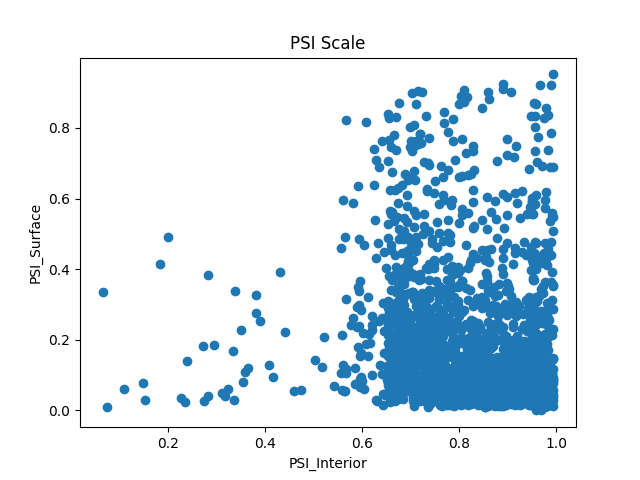

In [5]:
exopsi.psi_scale(PSI_data)

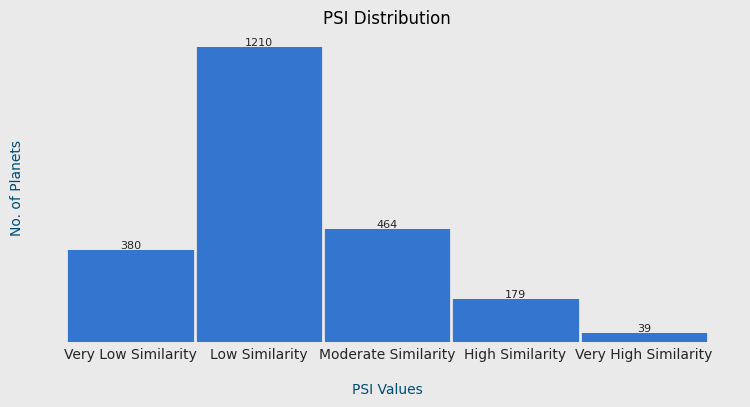

In [37]:
exopsi.psi_dist(PSI_data)

In [38]:
mars_data = exopsi.unit_conv(df[['P_RADIUS','P_DENSITY','P_ESCAPE']],[0.53,0.71,0.45],'MU',p_index=df.loc[:,'P_NAME'])
mars_data.to_csv("Mars Data.csv")

In [39]:
red_df = df[['P_NAME','P_RADIUS','P_DENSITY','P_ESCAPE','P_TEMP_SURF']]
red_df.to_csv("REDUCED PHL.csv")

In [40]:
red_df

,P_NAME,P_RADIUS,P_DENSITY,P_ESCAPE,P_TEMP_SURF
30,55 Cnc e,1.87207,1.217843,2.065940,2066.94610
33,61 Vir b,2.10748,0.543278,1.553368,1214.70880
63,BD-06 1339 b,2.84734,0.371739,1.736034,772.23385
72,CD Cet b,1.81602,0.659632,1.474930,492.19235
110,CoRoT-7 b,1.68150,0.857686,1.557259,1867.63490
...,...,...,...,...,...
5204,pi Men c,2.06264,0.413607,1.326531,1203.64660
5210,tau Cet e,1.80481,0.668756,1.475928,328.42972
5211,tau Cet f,1.80481,0.668756,1.475928,208.66189
5212,tau Cet g,1.17705,1.073888,1.219760,661.75475
